# Playground Data

#### Taking data from Pittsburgh's neighborhoods, I decided to find the neighborhoods with the best outdoor activity measured by those with the most playgrounds.

In [4]:
# load pandas, geopandas, and matplotlib
import geopandas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#### Read in the playground file

After importing the tools that I will use for this analysis including pandas, geopandas, and matplotlib I read in the playground file and printed out the first 3 data points to make sure it has been properly imported

In [6]:
playground = pd.read_csv("playgrounds.csv")
playground.head(3)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952


#### Condense the data 
I only want to show the neighborhoods with the highest count of playgrounds, so I created a new visual that shows the neighborhood along with its corresponding tally of playgrounds 

In [7]:
neighborhood_count = playground['neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='Total')
neighborhood_count.head(8)

,Neighborhood,Total
0,Squirrel Hill South,8
1,Beechview,5
2,South Side Slopes,5
3,Highland Park,4
4,Sheraden,4
5,Beltzhoover,4
6,Allegheny Center,4
7,Carrick,3


 
 
 #### Bar Graph

Now that I have enough data, I can plot it into a bar graph to compare the **top 8 neighborhoods with the highest count of playgrounds**

Text(0, 0.5, 'Total')

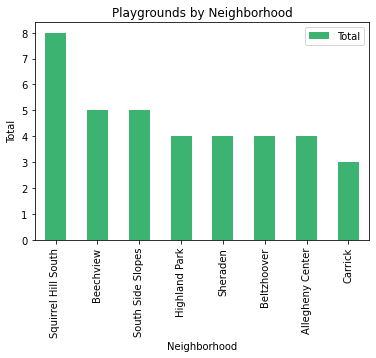

In [8]:
plot = neighborhood_count.iloc[:8].plot(kind='bar', x="Neighborhood", y="Total", title="Playgrounds by Neighborhood", color='mediumseagreen')
plot.set_xlabel("Neighborhood")
plot.set_ylabel("Total")

#### Here it shows clearly that Squirrel Hill South has the most amount of playgrounds, with a total count of 8. 

Beechview and South Side Slopes were the runners up as they tied with 5 playgrounds each. 



#### Next I display the map of all neighborhoods in Pittsburgh
This is my first step in getting the playground data to be shown in the map

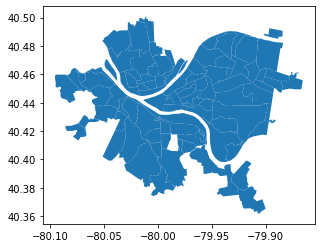

In [9]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

#### Now I merge the plain neighborhood file with my playground data. 

I label the axes and set the color scale to be green, where **dark green** represents the neighborhoods with the **highest count of playgrounds**, and the **lightest** shade of green represents neighborhoods with the **least amount** of neighborhoods. 

I also had to set the color of neighborhoods without any collected data to be gray as they were not considered.

Text(0.5, 1.0, 'Total Number of Playgrounds by Neighborhood')

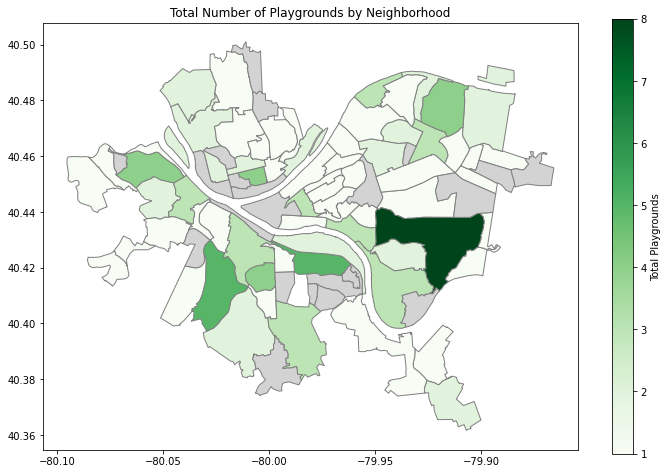

In [17]:
merged_data = neighborhoods.merge(neighborhood_count, how='left', left_on='hood', right_on='Neighborhood')

merged_data.plot(column='Total',  # set the data to be used for coloring
                 cmap='Greens',  # choose a color palette
                 edgecolor="gray",  # outline the neighborhoods in white
                 legend=True,  # show the legend
                 legend_kwds={'label': "Total Playgrounds"},  # label the legend
                 figsize=(12, 8),  # set the size of the plot
                 missing_kwds={"color": "lightgrey"}  # set neighborhoods with no data to gray
                 )

plt.title("Total Number of Playgrounds by Neighborhood")



## Squirrel Hill South is the best neighborhood in terms of having the most playgrounds